In [1]:
import pandas as pd
import praw

In [2]:
# Set up PRAW (Python Reddit API Wrapper)
user_agent = "Scraper 1.0 by /u/twalidaziz"
reddit = praw.Reddit(
    client_id = "U7g4MaFh79g4NKJ1sjDiwQ",
    client_secret = "-Mjz3rlhITqfSmFz90fa-Z_kYMIudQ",
    user_agent = user_agent
)

## 1. Data Extraction
### CONTENT WARNING: The following sections contain profanities and discussions of suicide or self-harm. Proceed with care.

In [3]:
# Lists to store extracted data
posts = []
seen_posts = []

# Set subreddit to extract
subreddit_name = 'depression'

# Fetch and extract submissions (posts) from the subreddit
for post in reddit.subreddit(subreddit_name).hot(limit=None):
    # Check for duplicate posts
    if post.id not in seen_posts:
        seen_posts.append(post.id) # Get post ID for duplication checking
        posts.append(post.title) # Get post and add to list

for post in reddit.subreddit(subreddit_name).new(limit=None):
    if post.id not in seen_posts:
        seen_posts.append(post.id)
        posts.append(post.title)

for post in reddit.subreddit(subreddit_name).top(limit=None, time_filter='all'):
    if post.id not in seen_posts:
        seen_posts.append(post.id)
        posts.append(post.title)

for post in reddit.subreddit(subreddit_name).top(limit=None, time_filter='year'):
    if post.id not in seen_posts:
        seen_posts.append(post.id)
        posts.append(post.title)

for post in reddit.subreddit(subreddit_name).top(limit=None, time_filter='month'):
    if post.id not in seen_posts:
        seen_posts.append(post.id)
        posts.append(post.title)

for post in reddit.subreddit(subreddit_name).top(limit=None, time_filter='week'):
    if post.id not in seen_posts:
        seen_posts.append(post.id)
        posts.append(post.title)

for post in reddit.subreddit(subreddit_name).top(limit=None, time_filter='day'):
    if post.id not in seen_posts:
        seen_posts.append(post.id)
        posts.append(post.title)

for post in reddit.subreddit(subreddit_name).rising(limit=None):
    if post.id not in seen_posts:
        seen_posts.append(post.id)
        posts.append(post.title)

print(len(posts))

3950


In [4]:
# Create and display DataFrame
df = pd.DataFrame({'text': posts})
df.head(10)

,text
0,Our most-broken and least-understood rules is ...
1,"Regular check-in post, with information about ..."
2,Are there any 'alternatives' to dying?
3,"What is your ""I'm coming out of a depressive e..."
4,I want a hug so bad...
5,I feel like I can’t live life
6,How do I tell my therapist I want to die witho...
7,Is it normal to stop enjoying the taste of foo...
8,Can depression be an addiction?
9,Tired lol


## 2. Text Preprocessing

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [6]:
# Download NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Initialize the lemmatizer and stop words list and profanity words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english') + ['ive', 'depress','depressed', 'depression', 'depressing'])
bad_words = set(['fck', 'fuck', 'fucking', 'fucker' 'shit'])

In [8]:
# Function to clean and standardize the text
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # # Remove words containing numbers
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove two letter words
    # Remove URLs and non-alphabetical characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    
    words = word_tokenize(text) # Tokenize the text
    # Perform lemmatization and remove stop words and profanity words
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words 
             and word.lower() not in bad_words]
    return ' '.join(words)

In [9]:
# Preprocess all posts
processed_posts = [preprocess(post) for post in posts]
df['clean_text'] = pd.DataFrame({'clean_text': processed_posts})
df.head(10)

,text,clean_text
0,Our most-broken and least-understood rules is ...,mostbroken leastunderstood rule helper may inv...
1,"Regular check-in post, with information about ...",regular checkin post information rule wikis
2,Are there any 'alternatives' to dying?,alternative dying
3,"What is your ""I'm coming out of a depressive e...",coming depressive episode sign
4,I want a hug so bad...,want hug bad
5,I feel like I can’t live life,feel like cant live life
6,How do I tell my therapist I want to die witho...,tell therapist want die without committed
7,Is it normal to stop enjoying the taste of foo...,normal stop enjoying taste food
8,Can depression be an addiction?,addiction
9,Tired lol,tired lol


## 3. Modeling and Evaluation

### Text Clustering using TF-IDF Vectorizer

In [10]:
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(processed_posts)

In [12]:
# Define the number of clusters
k = 3

In [13]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

KMeans(n_clusters=3)

In [14]:
# Get cluster assignments
labels = km.labels_

# Add TF-IDF cluster prediction in the DataFrame
df['tfidf_cluster'] = labels
df.head(10)

,text,clean_text,tfidf_cluster
0,Our most-broken and least-understood rules is ...,mostbroken leastunderstood rule helper may inv...,2
1,"Regular check-in post, with information about ...",regular checkin post information rule wikis,2
2,Are there any 'alternatives' to dying?,alternative dying,2
3,"What is your ""I'm coming out of a depressive e...",coming depressive episode sign,2
4,I want a hug so bad...,want hug bad,0
5,I feel like I can’t live life,feel like cant live life,2
6,How do I tell my therapist I want to die witho...,tell therapist want die without committed,0
7,Is it normal to stop enjoying the taste of foo...,normal stop enjoying taste food,2
8,Can depression be an addiction?,addiction,2
9,Tired lol,tired lol,1


In [15]:
# Print the number of posts in each cluster
print(Counter(labels))

Counter({2: 3475, 0: 413, 1: 62})


In [16]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [17]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 want
 dont
 know
 die
 anymore
 kill
 live
 life
 people
 wan

Cluster 1:
 tired
 time
 life
 sad
 sleep
 really
 everyday
 want
 living
 day

Cluster 2:
 life
 feel
 like
 hate
 people
 help
 wish
 day
 feeling
 better



In [18]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

Purity: 0.879746835443038


## 4. Results Visualization

In [19]:
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

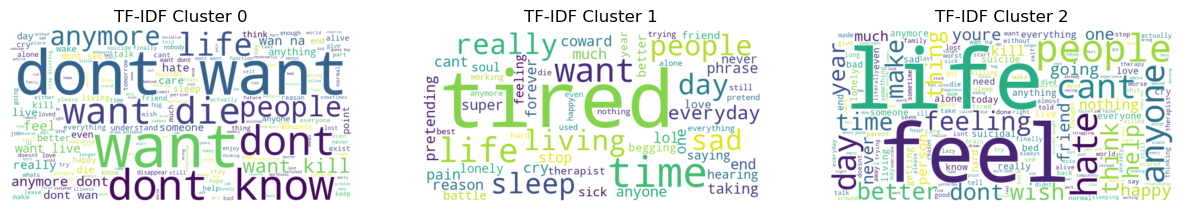

In [21]:
# Generate word cloud for Cluster 0
cluster0_text = ' '.join(df[df['tfidf_cluster'] == 0]['clean_text'])
cluster0_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster0_text)

# Generate word cloud for Cluster 1
cluster1_text = ' '.join(df[df['tfidf_cluster'] == 1]['clean_text'])
cluster1_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster1_text)

# Generate word cloud for Cluster 2
cluster2_text = ' '.join(df[df['tfidf_cluster'] == 2]['clean_text'])
cluster2_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster2_text)

# Set word cloud size
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cluster0_wordcloud, interpolation='bilinear')
plt.title('TF-IDF Cluster 0')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cluster1_wordcloud, interpolation='bilinear')
plt.title('TF-IDF Cluster 1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cluster2_wordcloud, interpolation='bilinear')
plt.title('TF-IDF Cluster 2')
plt.axis('off')

# Display word clouds
plt.show()

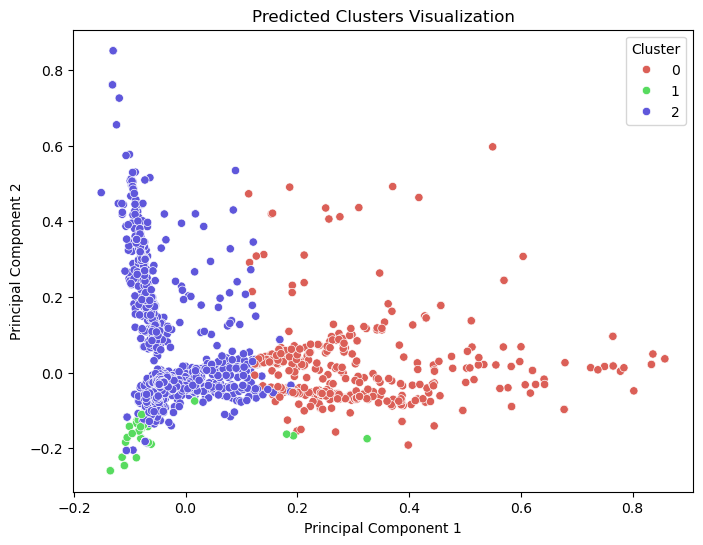

In [22]:
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], 
    hue=labels, 
    palette=sns.color_palette("hls", k), 
    legend="full"
)

plt.title("Predicted Clusters Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')

# Display the scatter plot
plt.show()

In [24]:
# Save data to csv file
df.to_csv('Part2_SW01083016.csv', header=True, encoding='utf-8', index=False)